<a href="https://colab.research.google.com/github/arturbernardo/benfords_law_2022/blob/main/Benford_Distribution_Por_Urna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise dos votos das eleições de 2022 na perspectiva da lei de Benford.

https://en.wikipedia.org/wiki/Benford%27s_law

---



**Importate**:
A lei de Benford não serve para comprovar irregularidades em eleições, mas ela serve como uma interessante ferramenta para que se procure por anomalias.
Sua teoria é complexa, o simples fato de um conjunto de números desviar na distribuição esperada não significa fraude. Usá-la para apontar fraudes sem entender a teoria corretamente é irresponsável.
Essa análise faz parte de uma série de análises feitas por mim, em nenhuma delas eu encontrei nada suspeito no processo eleitoral presidencial de 2022.
Essa análise é por urna, o que não mostra nada revelador, pois a quantidade de eleitores aptos por urna varia de 50 a 500, tendendo a algo entre os dois números, com o número de eleitores presentes mais comum sendo algo entre 200 e 300. Isso faz uma distribuição não orgânica, levando a maioria total das urnas conter 1XX votos por cantidato. A análise encontrada aqui, em última instância, serve para mostrar que muitos conjuntos de dados não se encaixam na lei de Benford.

In [ ]:
import pandas as pd
import plotly.express as px
from google.colab import drive
from pathlib import Path
import os
import numpy as np
import matplotlib.pyplot as plt
import math


In [ ]:
pd.options.display.max_columns = None


In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
all = pd.DataFrame()

# states = ['AC', 'AL', 'AM', 'AP', 'DF', 'ES', 'MA', 'MS', 'MG', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'SC', 'SE', 'ZZ', 'TO', 'SP', 'RS', 'CE', 'GO', 'BA']
states = ['MS']

for state in states:
  st = pd.read_csv('/content/drive/MyDrive/data/eleicoes2022unziped/bweb_2t_'+state+'_311020221535.csv', encoding="ISO-8859-1", sep = ';',
                   dtype={
                            "SG_UF": pd.CategoricalDtype(),
                            "CD_MUNICIPIO": pd.Int64Dtype(),
                            "NR_LOCAL_VOTACAO": pd.Int64Dtype(),
                            "NR_ZONA": pd.Int64Dtype(),
                            "NR_SECAO": pd.CategoricalDtype(),
                            "QT_VOTOS": pd.StringDtype()
                        })

  st_presidente = st[st.CD_CARGO_PERGUNTA == 1]
  filtered_df = st_presidente.loc[(st_presidente['NR_PARTIDO'] == 13) | (st_presidente['NR_PARTIDO'] == 22)]

  toUnion = [all, filtered_df]

  all = pd.concat(toUnion)

all


In [ ]:
df2 = all[['NR_LOCAL_VOTACAO',
                   'CD_MUNICIPIO',
                   'NR_ZONA',
                   'NR_SECAO',
                   'QT_VOTOS',
                   'QT_APTOS',
                   'QT_COMPARECIMENTO',
                   'CD_CARGO_PERGUNTA',
                   'NR_PARTIDO',
                   'NM_MUNICIPIO',
                   'SG_UF']]

In [ ]:
df_lula = df2.loc[(df2['NR_PARTIDO'] == 13)]

df_bolsonaro = df2.loc[(df2['NR_PARTIDO'] == 22)]

In [ ]:
df_lula

,NR_LOCAL_VOTACAO,CD_MUNICIPIO,NR_ZONA,NR_SECAO,QT_VOTOS,QT_APTOS,QT_COMPARECIMENTO,CD_CARGO_PERGUNTA,NR_PARTIDO,NM_MUNICIPIO,SG_UF
3,1015,90115,1,1,87,295,211,1,13,AMAMBAI,MS
9,1015,90115,1,2,95,299,222,1,13,AMAMBAI,MS
18,1015,90115,1,3,75,306,218,1,13,AMAMBAI,MS
26,1015,90115,1,4,78,289,219,1,13,AMAMBAI,MS
33,1015,90115,1,5,96,301,222,1,13,AMAMBAI,MS
...,...,...,...,...,...,...,...,...,...,...,...
54275,1171,90514,54,317,75,338,227,1,13,CAMPO GRANDE,MS
54286,1082,91596,54,319,144,339,304,1,13,TERENOS,MS
54293,1082,91596,54,320,92,326,259,1,13,TERENOS,MS
54300,1040,91596,54,321,98,303,262,1,13,TERENOS,MS


In [ ]:
df_lula_1 = df_lula.loc[df_lula['QT_VOTOS'].astype(str).str.startswith('1', na=False)]
df_lula_2 = df_lula.loc[df_lula['QT_VOTOS'].astype(str).str.startswith('2', na=False)]
df_lula_3 = df_lula.loc[df_lula['QT_VOTOS'].astype(str).str.startswith('3', na=False)]
df_lula_4 = df_lula.loc[df_lula['QT_VOTOS'].astype(str).str.startswith('4', na=False)]
df_lula_5 = df_lula.loc[df_lula['QT_VOTOS'].astype(str).str.startswith('5', na=False)]
df_lula_6 = df_lula.loc[df_lula['QT_VOTOS'].astype(str).str.startswith('6', na=False)]
df_lula_7 = df_lula.loc[df_lula['QT_VOTOS'].astype(str).str.startswith('7', na=False)]
df_lula_8 = df_lula.loc[df_lula['QT_VOTOS'].astype(str).str.startswith('8', na=False)]
df_lula_9 = df_lula.loc[df_lula['QT_VOTOS'].astype(str).str.startswith('9', na=False)]

df_bolsonaro_1 = df_bolsonaro.loc[df_bolsonaro['QT_VOTOS'].astype(str).str.startswith('1', na=False)]
df_bolsonaro_2 = df_bolsonaro.loc[df_bolsonaro['QT_VOTOS'].astype(str).str.startswith('2', na=False)]
df_bolsonaro_3 = df_bolsonaro.loc[df_bolsonaro['QT_VOTOS'].astype(str).str.startswith('3', na=False)]
df_bolsonaro_4 = df_bolsonaro.loc[df_bolsonaro['QT_VOTOS'].astype(str).str.startswith('4', na=False)]
df_bolsonaro_5 = df_bolsonaro.loc[df_bolsonaro['QT_VOTOS'].astype(str).str.startswith('5', na=False)]
df_bolsonaro_6 = df_bolsonaro.loc[df_bolsonaro['QT_VOTOS'].astype(str).str.startswith('6', na=False)]
df_bolsonaro_7 = df_bolsonaro.loc[df_bolsonaro['QT_VOTOS'].astype(str).str.startswith('7', na=False)]
df_bolsonaro_8 = df_bolsonaro.loc[df_bolsonaro['QT_VOTOS'].astype(str).str.startswith('8', na=False)]
df_bolsonaro_9 = df_bolsonaro.loc[df_bolsonaro['QT_VOTOS'].astype(str).str.startswith('9', na=False)]

# print(df_lula_1.size)
# print(df_lula_2.size)
# print(df_lula_3.size)
# print(df_lula_4.size)
# print(df_lula_5.size)
# print(df_lula_6.size)
# print(df_lula_7.size)
# print(df_lula_8.size)
# print(df_lula_9.size)


In [ ]:
total_lula = df_lula_1.size + df_lula_2.size + df_lula_3.size + df_lula_4.size + df_lula_5.size + df_lula_6.size + df_lula_7.size + df_lula_8.size + df_lula_9.size
total_lula

76032

In [ ]:
percent_lula_1 = df_lula_1.size * 100 / total_lula
percent_lula_2 = df_lula_2.size * 100 / total_lula
percent_lula_3 = df_lula_3.size * 100 / total_lula
percent_lula_4 = df_lula_4.size * 100 / total_lula
percent_lula_5 = df_lula_5.size * 100 / total_lula
percent_lula_6 = df_lula_6.size * 100 / total_lula
percent_lula_7 = df_lula_7.size * 100 / total_lula
percent_lula_8 = df_lula_8.size * 100 / total_lula
percent_lula_9 = df_lula_9.size * 100 / total_lula

cem = percent_lula_1 + percent_lula_2 + percent_lula_3 + percent_lula_4 + percent_lula_5 + percent_lula_6 + percent_lula_7 + percent_lula_8 + percent_lula_9
cem # (tem de dar 100% a soma)

100.0

In [ ]:
total_bolsonaro = df_bolsonaro_1.size + df_bolsonaro_2.size + df_bolsonaro_3.size + df_bolsonaro_4.size + df_bolsonaro_5.size + df_bolsonaro_6.size + df_bolsonaro_7.size + df_bolsonaro_8.size + df_bolsonaro_9.size
total_bolsonaro

76021

In [ ]:
percent_bolsonaro_1 = df_bolsonaro_1.size * 100 / total_bolsonaro
percent_bolsonaro_2 = df_bolsonaro_2.size * 100 / total_bolsonaro
percent_bolsonaro_3 = df_bolsonaro_3.size * 100 / total_bolsonaro
percent_bolsonaro_4 = df_bolsonaro_4.size * 100 / total_bolsonaro
percent_bolsonaro_5 = df_bolsonaro_5.size * 100 / total_bolsonaro
percent_bolsonaro_6 = df_bolsonaro_6.size * 100 / total_bolsonaro
percent_bolsonaro_7 = df_bolsonaro_7.size * 100 / total_bolsonaro
percent_bolsonaro_8 = df_bolsonaro_8.size * 100 / total_bolsonaro
percent_bolsonaro_9 = df_bolsonaro_9.size * 100 / total_bolsonaro

cem = percent_bolsonaro_1 + percent_bolsonaro_2 + percent_bolsonaro_3 + percent_bolsonaro_4 + percent_bolsonaro_5 + percent_bolsonaro_6 + percent_bolsonaro_7 + percent_bolsonaro_8 + percent_bolsonaro_9
cem # (tem de dar 100% a soma)

99.99999999999999

# `POR URNAS, LULA`

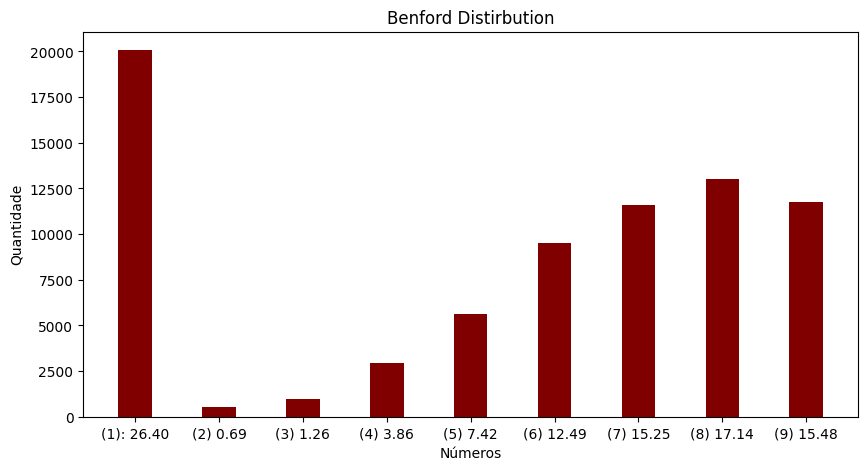

In [ ]:
# data = {'1':df_lula_1.size,
#         '2':df_lula_2.size,
#         '3':df_lula_3.size,
#         '4':df_lula_4.size,
#         '5':df_lula_5.size,
#         '6':df_lula_6.size,
#         '7':df_lula_7.size,
#         '8':df_lula_8.size,
#         '9':df_lula_9.size}

labels = ['(1): %.2f' %percent_lula_1,
        '(2) %.2f' %percent_lula_2,
        '(3) %.2f' %percent_lula_3,
        '(4) %.2f' %percent_lula_4,
        '(5) %.2f' %percent_lula_5,
        '(6) %.2f' %percent_lula_6,
        '(7) %.2f' %percent_lula_7,
        '(8) %.2f' %percent_lula_8,
        '(9) %.2f' %percent_lula_9]

valores = [df_lula_1.size,
        df_lula_2.size,
        df_lula_3.size,
        df_lula_4.size,
        df_lula_5.size,
        df_lula_6.size,
        df_lula_7.size,
        df_lula_8.size,
        df_lula_9.size]
numbers = list(labels)
amounts = list(valores)

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(numbers, amounts, color ='maroon',
        width = 0.4)

plt.xlabel("Números")
plt.ylabel("Quantidade")
plt.title("Benford Distirbution")
plt.show()

# POR URNA, BOLSONARO

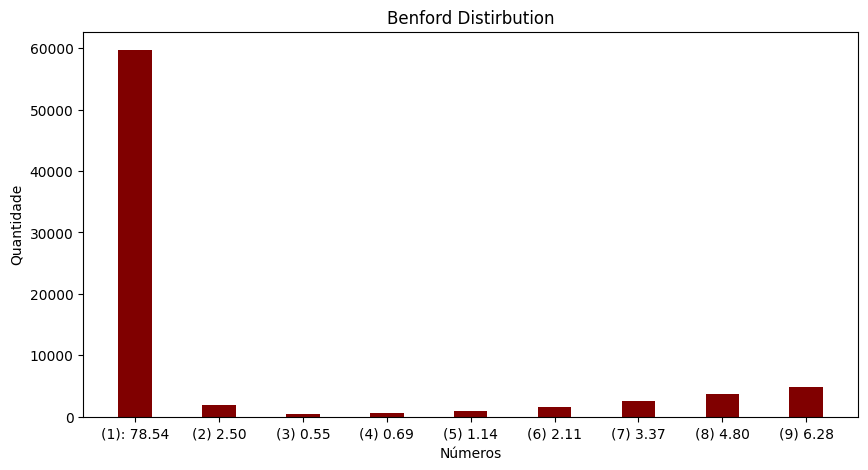

In [ ]:
# data = {'1':df_bolsonaro_1.size,
  #         '2':df_bolsonaro_2.size,
  #         '3':df_bolsonaro_3.size,
  #         '4':df_bolsonaro_4.size,
  #         '5':df_bolsonaro_5.size,
  #         '6':df_bolsonaro_6.size,
  #         '7':df_bolsonaro_7.size,
  #         '8':df_bolsonaro_8.size,
  #         '9':df_bolsonaro_9.size}

labels = ['(1): %.2f' %percent_bolsonaro_1,
          '(2) %.2f' %percent_bolsonaro_2,
          '(3) %.2f' %percent_bolsonaro_3,
          '(4) %.2f' %percent_bolsonaro_4,
          '(5) %.2f' %percent_bolsonaro_5,
          '(6) %.2f' %percent_bolsonaro_6,
          '(7) %.2f' %percent_bolsonaro_7,
          '(8) %.2f' %percent_bolsonaro_8,
          '(9) %.2f' %percent_bolsonaro_9]

valores = [df_bolsonaro_1.size,
            df_bolsonaro_2.size,
            df_bolsonaro_3.size,
            df_bolsonaro_4.size,
            df_bolsonaro_5.size,
            df_bolsonaro_6.size,
            df_bolsonaro_7.size,
            df_bolsonaro_8.size,
            df_bolsonaro_9.size]
numbers = list(labels)
amounts = list(valores)

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(numbers, amounts, color ='maroon',
width = 0.4)

plt.xlabel("Números")
plt.ylabel("Quantidade")
plt.title("Benford Distirbution")
plt.show()

# APTOS POR URNA

In [ ]:
                  #  'QT_APTOS',
                  #  'QT_COMPARECIMENTO',
# df2['QT_APTOS']
# df2['QT_COMPARECIMENTO']

df_aptos = df2['QT_APTOS']
df_comparecimento = df2['QT_COMPARECIMENTO']
df_aptos_1 = df2.loc[df2['QT_APTOS'].astype(str).str.startswith('1', na=False)]
df_aptos_2 = df2.loc[df2['QT_APTOS'].astype(str).str.startswith('2', na=False)]
df_aptos_3 = df2.loc[df2['QT_APTOS'].astype(str).str.startswith('3', na=False)]
df_aptos_4 = df2.loc[df2['QT_APTOS'].astype(str).str.startswith('4', na=False)]
df_aptos_5 = df2.loc[df2['QT_APTOS'].astype(str).str.startswith('5', na=False)]
df_aptos_6 = df2.loc[df2['QT_APTOS'].astype(str).str.startswith('6', na=False)]
df_aptos_7 = df2.loc[df2['QT_APTOS'].astype(str).str.startswith('7', na=False)]
df_aptos_8 = df2.loc[df2['QT_APTOS'].astype(str).str.startswith('8', na=False)]
df_aptos_9 = df2.loc[df2['QT_APTOS'].astype(str).str.startswith('9', na=False)]

In [ ]:
df_aptos.min()

52

In [ ]:
total_aptos = df_aptos_1.size + df_aptos_2.size +df_aptos_3.size + df_aptos_4.size + df_aptos_5.size + df_aptos_6.size + df_aptos_7.size + df_aptos_8.size + df_aptos_9.size
total_aptos

152053

In [ ]:
percent_aptos_1 = df_aptos_1.size * 100 / total_aptos
percent_aptos_2 = df_aptos_2.size * 100 / total_aptos
percent_aptos_3 = df_aptos_3.size * 100 / total_aptos
percent_aptos_4 = df_aptos_4.size * 100 / total_aptos
percent_aptos_5 = df_aptos_5.size * 100 / total_aptos
percent_aptos_6 = df_aptos_6.size * 100 / total_aptos
percent_aptos_7 = df_aptos_7.size * 100 / total_aptos
percent_aptos_8 = df_aptos_8.size * 100 / total_aptos
percent_aptos_9 = df_aptos_9.size * 100 / total_aptos

cem = percent_aptos_1 + percent_aptos_2 + percent_aptos_3 + percent_aptos_4 + percent_aptos_5 + percent_aptos_6 + percent_aptos_7 + percent_aptos_8 + percent_aptos_9
cem # (tem de dar 100% a soma)

99.99999999999999

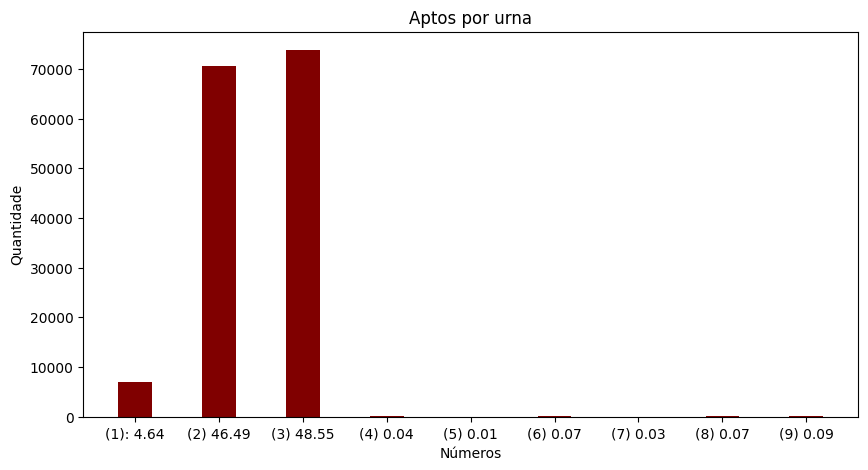

In [ ]:
labels = ['(1): %.2f' %percent_aptos_1,
        '(2) %.2f' %percent_aptos_2,
        '(3) %.2f' %percent_aptos_3,
        '(4) %.2f' %percent_aptos_4,
        '(5) %.2f' %percent_aptos_5,
        '(6) %.2f' %percent_aptos_6,
        '(7) %.2f' %percent_aptos_7,
        '(8) %.2f' %percent_aptos_8,
        '(9) %.2f' %percent_aptos_9]

valores = [df_aptos_1.size,
        df_aptos_2.size,
        df_aptos_3.size,
        df_aptos_4.size,
        df_aptos_5.size,
        df_aptos_6.size,
        df_aptos_7.size,
        df_aptos_8.size,
        df_aptos_9.size]
numbers = list(labels)
amounts = list(valores)

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(numbers, amounts, color ='maroon',
        width = 0.4)

plt.xlabel("Números")
plt.ylabel("Quantidade")
plt.title("Aptos por urna")
plt.show()

# COMPARECIMENTO POR URNA

In [ ]:
df_comparecimento_1 = df2.loc[df2['QT_COMPARECIMENTO'].astype(str).str.startswith('1', na=False)]
df_comparecimento_2 = df2.loc[df2['QT_COMPARECIMENTO'].astype(str).str.startswith('2', na=False)]
df_comparecimento_3 = df2.loc[df2['QT_COMPARECIMENTO'].astype(str).str.startswith('3', na=False)]
df_comparecimento_4 = df2.loc[df2['QT_COMPARECIMENTO'].astype(str).str.startswith('4', na=False)]
df_comparecimento_5 = df2.loc[df2['QT_COMPARECIMENTO'].astype(str).str.startswith('5', na=False)]
df_comparecimento_6 = df2.loc[df2['QT_COMPARECIMENTO'].astype(str).str.startswith('6', na=False)]
df_comparecimento_7 = df2.loc[df2['QT_COMPARECIMENTO'].astype(str).str.startswith('7', na=False)]
df_comparecimento_8 = df2.loc[df2['QT_COMPARECIMENTO'].astype(str).str.startswith('8', na=False)]
df_comparecimento_9 = df2.loc[df2['QT_COMPARECIMENTO'].astype(str).str.startswith('9', na=False)]

In [ ]:
total_comparecimento = df_comparecimento_1.size + df_comparecimento_2.size +df_comparecimento_3.size + df_comparecimento_4.size + df_comparecimento_5.size + df_comparecimento_6.size + df_comparecimento_7.size + df_comparecimento_8.size + df_comparecimento_9.size
total_comparecimento

152053

In [ ]:
percent_comparecimento_1 = df_comparecimento_1.size * 100 / total_comparecimento
percent_comparecimento_2 = df_comparecimento_2.size * 100 / total_comparecimento
percent_comparecimento_3 = df_comparecimento_3.size * 100 / total_comparecimento
percent_comparecimento_4 = df_comparecimento_4.size * 100 / total_comparecimento
percent_comparecimento_5 = df_comparecimento_5.size * 100 / total_comparecimento
percent_comparecimento_6 = df_comparecimento_6.size * 100 / total_comparecimento
percent_comparecimento_7 = df_comparecimento_7.size * 100 / total_comparecimento
percent_comparecimento_8 = df_comparecimento_8.size * 100 / total_comparecimento
percent_comparecimento_9 = df_comparecimento_9.size * 100 / total_comparecimento

cem = percent_comparecimento_1 + percent_comparecimento_2 + percent_comparecimento_3 + percent_comparecimento_4 + percent_comparecimento_5 + percent_comparecimento_6 + percent_comparecimento_7 + percent_comparecimento_8 + percent_comparecimento_9

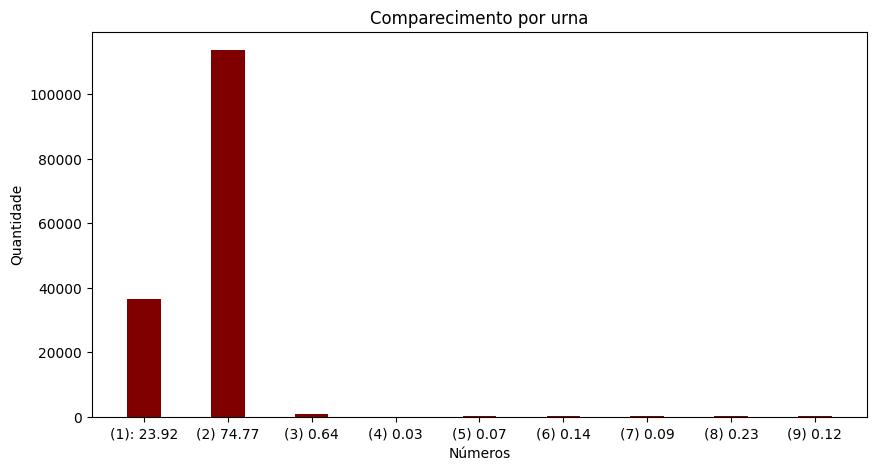

In [ ]:
labels = ['(1): %.2f' %percent_comparecimento_1,
        '(2) %.2f' %percent_comparecimento_2,
        '(3) %.2f' %percent_comparecimento_3,
        '(4) %.2f' %percent_comparecimento_4,
        '(5) %.2f' %percent_comparecimento_5,
        '(6) %.2f' %percent_comparecimento_6,
        '(7) %.2f' %percent_comparecimento_7,
        '(8) %.2f' %percent_comparecimento_8,
        '(9) %.2f' %percent_comparecimento_9]

valores = [df_comparecimento_1.size,
          df_comparecimento_2.size,
          df_comparecimento_3.size,
          df_comparecimento_4.size,
          df_comparecimento_5.size,
          df_comparecimento_6.size,
          df_comparecimento_7.size,
          df_comparecimento_8.size,
          df_comparecimento_9.size]
numbers = list(labels)
amounts = list(valores)

fig = plt.figure(figsize = (10, 5))

    # creating the bar plot
plt.bar(numbers, amounts, color ='maroon', width = 0.4)

plt.xlabel("Números")
plt.ylabel("Quantidade")
plt.title("Comparecimento por urna")
plt.show()